# Classification with BP - ring

## TenserFlow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
import tensorflow as tf
import tensorflow.keras as kr
from IPython.core.display import display, HTML
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()

Saving A2-ring-merged.txt to A2-ring-merged (1).txt
Saving A2-ring-test.txt to A2-ring-test.txt


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "A2-ring-merged.txt" with length 220021 bytes


In [7]:
filename1 = 'A2-ring-merged.txt'
ring_separable_data = np.loadtxt(filename1, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

train_df = pd.DataFrame(ring_separable_data)
print(train_df)

filename2 = 'A2-ring-test.txt'
ring_test_data = np.loadtxt(filename2, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

test_df = pd.DataFrame(ring_test_data)
print(test_df)

             x         y  C
0    -0.137094  0.899654  0
1     0.542574 -0.492435  0
2    -0.658204  0.605110  1
3    -0.869820  0.519287  0
4     0.678610  0.346579  1
...        ...       ... ..
9995  0.419610 -0.482939  0
9996 -0.456348  0.910800  0
9997 -0.003036 -0.295153  1
9998  0.765332  0.798063  0
9999 -0.532259 -0.302748  1

[10000 rows x 3 columns]
             x         y  C
0     0.512196  0.112623  1
1     0.610173 -0.387091  1
2     0.927970  0.245895  0
3     0.159933  0.111516  0
4    -0.451556  0.877259  0
...        ...       ... ..
9995  0.958078 -0.422827  0
9996  0.544659 -0.590963  0
9997 -0.684583  0.916596  0
9998  0.906773  0.274620  0
9999 -0.544859  0.132948  1

[10000 rows x 3 columns]


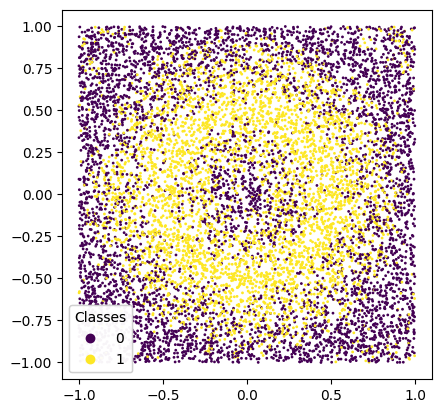

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=train_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

### Exploring Test Data

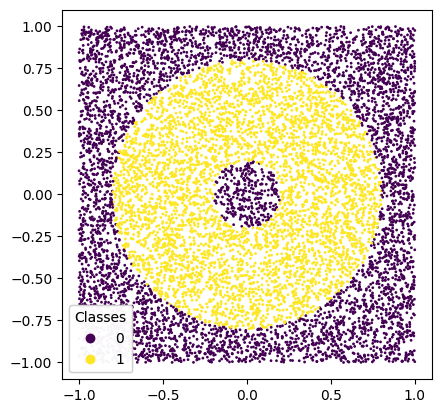

In [9]:
fig, ax2 = plt.subplots()
ax2.set_aspect('equal', 'box')
scatter2 = ax2.scatter(test_df.iloc[:,0], test_df.iloc[:,1], c=test_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax2.add_artist(legend2)
plt.show()

## Cross validation (using Keras)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
235/235 [==============================] - 1s 2ms/step - loss: 0.2490 - acc: 0.5128
Epoch 2/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2427 - acc: 0.5553
Epoch 3/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2389 - acc: 0.5553
Epoch 4/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2356 - acc: 0.5553
Epoch 5/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2316 - acc: 0.5605
Epoch 6/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2269 - acc: 0.5945
Epoch 7/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2216 - acc: 0.6316
Epoch 8/200
235/235 [==============================] - 1s 2ms/step - loss: 0.2159 - acc: 0.6681
Epoch 9/200
235/235 [==============================] - 1s 3ms/step - loss: 0.2098 - acc: 0.6877
Epoch 10/200
235/235 [=================

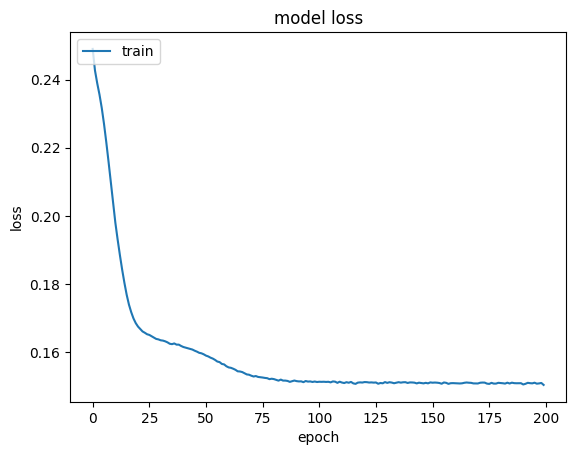

79/79 [==============================] - 0s 1ms/step


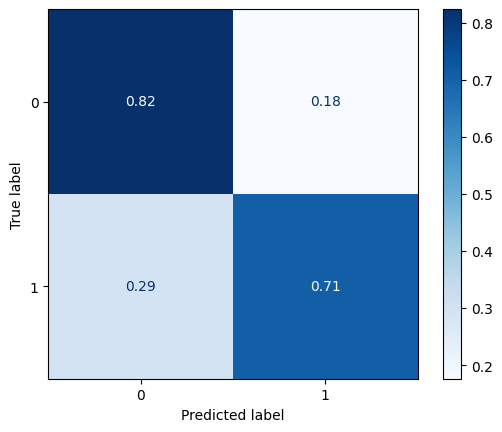

Confusion matrix:
 [[1112  238]
 [ 338  812]]
Percentage classification error obtained from validation set: 23.04%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
235/235 [==============================] - 1s 2ms/step - loss: 0.2432 - acc: 0.5180
Epoch 2/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2364 - acc: 0.5591
Epoch 3/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2291 - acc: 0.6539
Epoch 4/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2206 - acc: 0.6905
Epoch 5/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2103 - acc: 0.7171
Epoch 6/200
235/235 [==============================] - 0s 2ms/step - loss: 0.1997 - acc: 0.7419
Epoch 7/200
235/235 [==============================] - 0s 2ms/step - loss: 0.1901 - acc: 0.7493
Epoch 8/200
235/235 [==============================] - 0s 2ms/step - loss: 0.1828 - acc: 0.7544
Epoch 9/200
235/235 

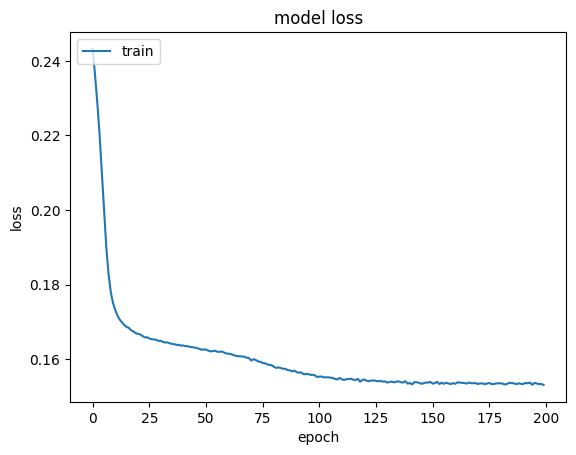

79/79 [==============================] - 0s 2ms/step


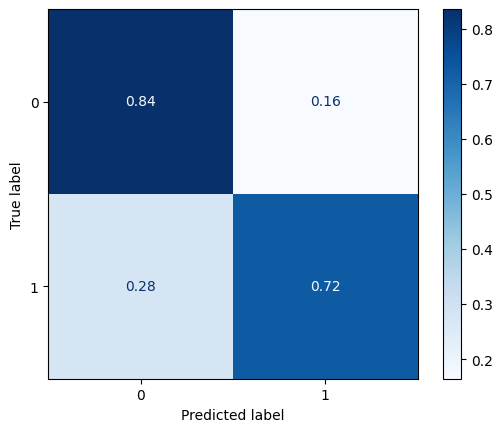

Confusion matrix:
 [[1184  233]
 [ 298  785]]
Percentage classification error obtained from validation set: 21.240000000000002%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
235/235 [==============================] - 1s 2ms/step - loss: 0.2497 - acc: 0.4989
Epoch 2/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2414 - acc: 0.5397
Epoch 3/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2369 - acc: 0.5535
Epoch 4/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2332 - acc: 0.5435
Epoch 5/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2287 - acc: 0.5779
Epoch 6/200
235/235 [==============================] - 1s 3ms/step - loss: 0.2234 - acc: 0.6068
Epoch 7/200
235/235 [==============================] - 1s 2ms/step - loss: 0.2162 - acc: 0.6628
Epoch 8/200
235/235 [==============================] - 1s 2ms/step - loss: 0.2064 - acc: 0.7244
Epoch 9

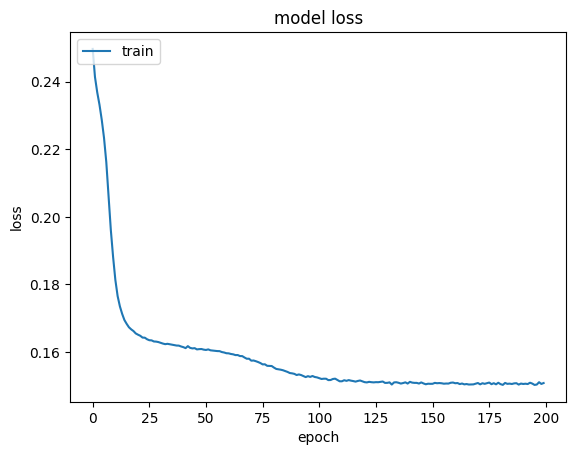

79/79 [==============================] - 0s 1ms/step


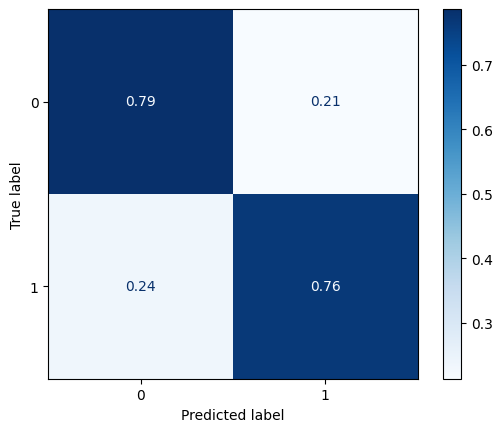

Confusion matrix:
 [[1072  291]
 [ 268  869]]
Percentage classification error obtained from validation set: 22.36%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
235/235 [==============================] - 1s 2ms/step - loss: 0.2423 - acc: 0.5484
Epoch 2/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2357 - acc: 0.5508
Epoch 3/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2294 - acc: 0.5668
Epoch 4/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2213 - acc: 0.6471
Epoch 5/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2127 - acc: 0.7031
Epoch 6/200
235/235 [==============================] - 0s 2ms/step - loss: 0.2039 - acc: 0.7237
Epoch 7/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1953 - acc: 0.7415
Epoch 8/200
235/235 [==============================] - 1s 3ms/step - loss: 0.1873 - acc: 0.7536
Epoch 9/200
235/235 

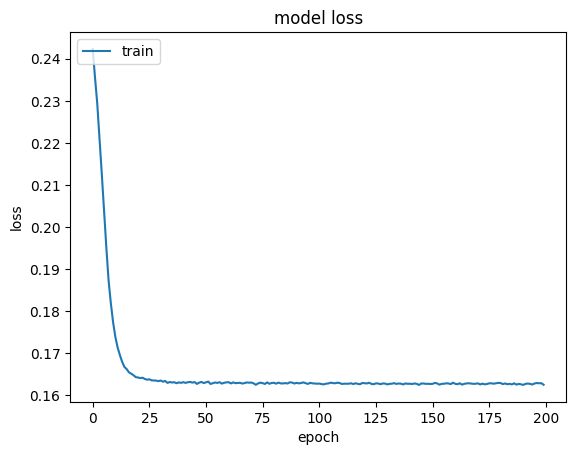

79/79 [==============================] - 0s 2ms/step


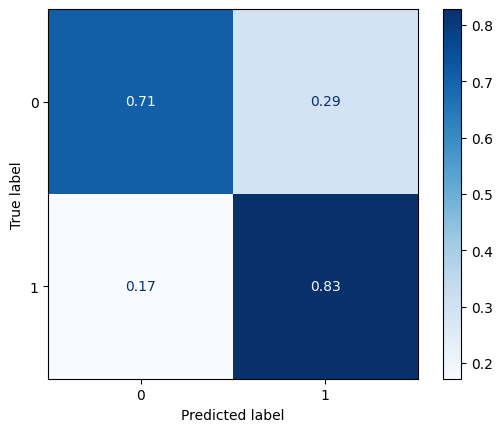

Confusion matrix:
 [[983 402]
 [192 923]]
Percentage classification error obtained from validation set: 23.76%

Results of cross validation:
------------------------------------------------------------------------
Percentage classification error obtained from validation set per fold
------------------------------------------------------------------------
> Fold 1 - 23.04%
------------------------------------------------------------------------
> Fold 2 - 21.240000000000002%
------------------------------------------------------------------------
> Fold 3 - 22.36%
------------------------------------------------------------------------
> Fold 4 - 23.76%
------------------------------------------------------------------------
Mean percentage classification error obtained from cross validation:
> 22.6% (+- 0.9282241108697831)
------------------------------------------------------------------------


In [10]:
X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()

learning_rate = 0.05
momentum = 0.1
nn = [2, 16, 8, 1]

fold_no = 1

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')


    model = kr.Sequential()

    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

    model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

    history = model.fit(X_train[train], y_train[train], epochs=200)

    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    y_pred = model.predict(X_train[validation])

    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)

    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                    cmap=plt.cm.Blues,
                                                    normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')

    cv_percentage_classification_errors.append(percentage_classification_error)

    fold_no = fold_no + 1

print('\nResults of cross validation:')
print('------------------------------------------------------------------------')
print('Percentage classification error obtained from validation set per fold')
for i in range(0, len(cv_percentage_classification_errors)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - {cv_percentage_classification_errors[i]}%')
print('------------------------------------------------------------------------')
print('Mean percentage classification error obtained from cross validation:')
print(f'> {np.mean(cv_percentage_classification_errors)}% (+- {np.std(cv_percentage_classification_errors)})')
print('------------------------------------------------------------------------')

## Training (using Keras)

Epoch 1/200
313/313 [==============================] - 1s 2ms/step - loss: 0.2434 - acc: 0.5515
Epoch 2/200
313/313 [==============================] - 1s 2ms/step - loss: 0.2391 - acc: 0.5510
Epoch 3/200
313/313 [==============================] - 1s 2ms/step - loss: 0.2326 - acc: 0.5523
Epoch 4/200
313/313 [==============================] - 1s 2ms/step - loss: 0.2220 - acc: 0.6324
Epoch 5/200
313/313 [==============================] - 1s 2ms/step - loss: 0.2086 - acc: 0.7051
Epoch 6/200
313/313 [==============================] - 1s 2ms/step - loss: 0.1948 - acc: 0.7416
Epoch 7/200
313/313 [==============================] - 1s 2ms/step - loss: 0.1842 - acc: 0.7552
Epoch 8/200
313/313 [==============================] - 1s 2ms/step - loss: 0.1772 - acc: 0.7592
Epoch 9/200
313/313 [==============================] - 1s 2ms/step - loss: 0.1726 - acc: 0.7620
Epoch 10/200
313/313 [==============================] - 1s 2ms/step - loss: 0.1698 - acc: 0.7631
Epoch 11/200
313/313 [=================

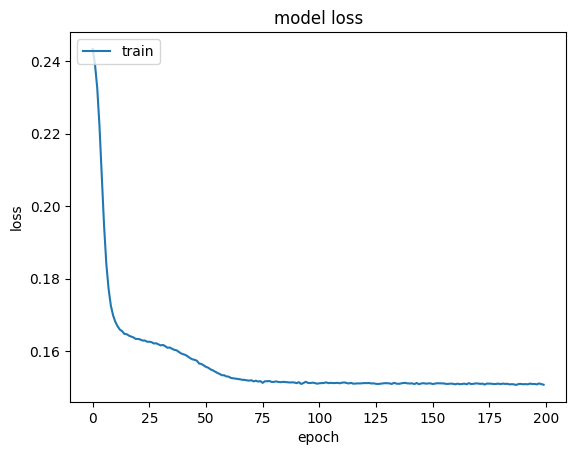

In [11]:
learning_rate = 0.05
momentum = 0.1
nn = [2, 16, 8, 1]

model = kr.Sequential()

l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

history = model.fit(X_train, y_train, epochs=200)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Test (using Keras)

313/313 [==============================] - 1s 2ms/step


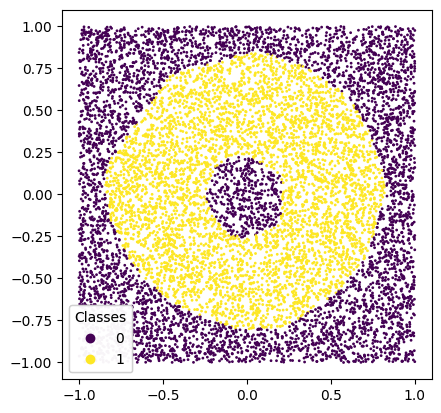

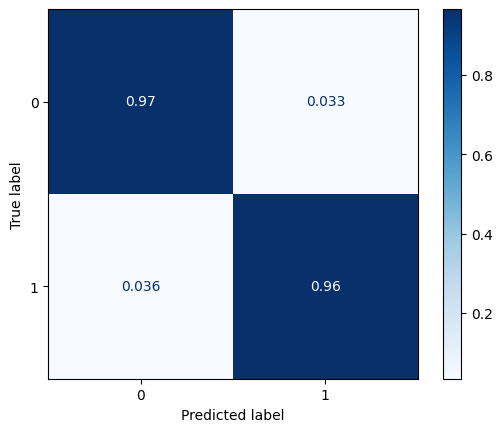

Confusion matrix:
 [[5155  178]
 [ 168 4499]]
Percentage classification error obtained from test set: 3.46%


In [12]:
X_test = test_df[['x', 'y']].to_numpy()
y_test = test_df['C'].to_numpy()

y_pred = model.predict(X_test)

threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

fig, ax3 = plt.subplots()
ax3.set_aspect('equal', 'box')
scatter3 = ax3.scatter(X_test[:,0], X_test[:,1], c=y_pred[:], s=1)
legend3 = ax3.legend(*scatter3.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax3.add_artist(legend3)
plt.show()


disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
																								cmap=plt.cm.Blues,
																								normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [13]:
y_pred = np.concatenate(y_pred, axis=0)

ring_bp_results = { 'real_value': y_test,
                    'prediction': y_pred}

df = pd.DataFrame(ring_bp_results)

df.to_csv('ring_bp_results.csv')

In [14]:
weights = model.get_weights()
np.savetxt('ring_bp_model_weights.csv', weights, fmt='%s', delimiter=',')

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:1533: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("ring_bp_model.json", "w") as json_file:
    json_file.write(model_json)